# CRISP-DM Exercise (Airbnb Seattle dataset)

Today we will be practicing CRoss Industry Standard Process for Data Mining with Airbnb's Seattle dataset. The dataset consists of 3 csv files: calendar, listings and reviews. Lets begin by reviewing the basic structure of CRISP-DM:

- Business Understanding
- Data Understanding
- Preping data for analysis
- Data Modeling
- Evaluating results
- Deploy or communicate

Like in the Udacity exercise, we will be first assessing the data so we may find out what interesting questions may be asked.

**Open and assess data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
cal_df = pd.read_csv('./data/calendar.csv')
list_df = pd.read_csv('./data/listings.csv')
rev_df = pd.read_csv('./data/reviews.csv')

### Assessing calendar csv

In [4]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
# basically, calendar spans listings for the entire year of 2016
print(cal_df.info())
cal_df.sort_values(by='date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
None


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1171285,7109735,2016-01-04,f,NaN
442380,5736082,2016-01-04,f,NaN
997180,7435912,2016-01-04,t,$70.00
1203040,1777158,2016-01-04,f,NaN
...,...,...,...,...
924544,8849095,2017-01-02,t,$250.00
924179,9995551,2017-01-02,t,$79.00
923814,1450262,2017-01-02,t,$295.00
928194,6304139,2017-01-02,t,$95.00


In [6]:
assert sum(cal_df['available'].apply(lambda val: val == 't')) == sum(cal_df['available'] == 't')
cal_df['date'].astype(np.datetime64)
assert sum(cal_df['price'].str.extract(r'\$([0-9.]+)', expand=False).isna()) == sum(cal_df['price'].isna())

In [7]:
cal_df['available'] = cal_df['available'].apply(lambda val: val == 't')
cal_df['date'] = cal_df['date'].astype(np.datetime64)
cal_df['price'] = cal_df['price'].str.extract(r'\$([0-9.]+)', expand=False).astype(float)

cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  bool          
 3   price       934542 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 33.2 MB


In [8]:
# price is only NaN when properties are renting
assert cal_df.query('available == False').shape[0] == sum(cal_df['price'].isna())

### Assessing listings csv

In [9]:
list_df.info()
# there is a lot of string type columns here
# clearly some of these types are incorrect

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [10]:
summary = list_df.select_dtypes(include=[object]).describe()
summary

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3818,3818,3818,3641,3249,3818,3818,2786,2212,2884,3498,3498,3818,3498,3818,3816,3816,3810,2959,3295,3295,3045,3816,3816,3816,3518,3818,3816,3816,3818,3402,3818,3818,3818,3818,3811,3818,3818,3818,3818,3818,3817,3818,3818,3818,3818,2009,1517,1866,2788,3818,3818,3818,3818,3191,3191,3818,3818,3818,3818,3818,3818
unique,3818,1,3792,3478,3119,3742,1,2506,1999,2574,3498,3498,3818,3498,2751,1466,1380,120,2011,4,45,2,2,2743,2743,102,116,2,2,1442,81,87,17,7,2,28,1,7,1,1,2,16,3,5,3284,273,395,356,46,118,45,34,1,1,984,321,1,1,2,3,2,2
top,https://www.airbnb.com/rooms/4941356,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,All of our rentals are fully licensed and regu...,Convenient public transportation. The location...,https://a2.muscache.com/ac/pictures/42262534/4...,https://a2.muscache.com/im/pictures/70e6ba58-6...,https://a1.muscache.com/ac/pictures/6568516/57...,https://a2.muscache.com/ac/pictures/70e6ba58-6...,https://www.airbnb.com/users/show/8534462,Andrew,2013-08-30,"Seattle, Washington, United States",It would be my pleasure to share and explore t...,within an hour,100%,100%,f,https://a2.muscache.com/ac/pictures/a4d7d053-c...,https://a2.muscache.com/ac/pictures/a4d7d053-c...,Capitol Hill,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"1st Avenue, Seattle, WA 98101, United States",Capitol Hill,Broadway,Other neighborhoods,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,Real Bed,{},$150.00,$500.00,"$2,500.00",$100.00,$50.00,$0.00,today,t,2016-01-04,2015-09-21,2016-01-02,f,WASHINGTON,f,strict,f,f
freq,1,3818,3,15,14,10,3818,17,39,32,1,1,1,1,46,56,51,3259,46,1692,2371,3044,3038,46,46,405,595,3809,2997,30,351,397,794,3810,3817,420,3818,3810,3818,3818,3412,1733,2541,3657,45,162,94,66,348,310,2048,706,3818,3818,25,94,3818,3818,3227,1417,3497,3443


In [11]:
# a bunch of columns have one single value
single_valued_cols = summary[summary.loc[['unique'], :] == 1]\
    .dropna(axis=0, how='all')\
    .dropna(axis=1, how='all')\
    .columns
    
single_valued_cols

Index(['last_scraped', 'experiences_offered', 'market', 'country_code',
       'country', 'has_availability', 'calendar_last_scraped',
       'requires_license', 'jurisdiction_names'],
      dtype='object')

In [12]:
list_df.drop(columns=single_valued_cols, inplace=True)
list_df.drop(columns=['city', 'state'], inplace=True) # all samples are known to be from the city of Seattle

In [13]:
# there are quite a few variables with numeric values represented as strings
wrong_type_num_cols = summary.loc[:, summary.loc['top', :].str.startswith('$')].columns
wrong_type_num_cols

Index(['price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'extra_people'],
      dtype='object')

In [14]:
# convert all numeric money values to numbers
list_df.loc[:,wrong_type_num_cols] = list_df[wrong_type_num_cols] \
    .apply(lambda col: col.str.replace('$', '', regex=False).str.replace(',', '', regex=False)) \
    .astype(np.number)

# test type and assess values
print(list_df.loc[:,wrong_type_num_cols].info())
list_df.loc[:,wrong_type_num_cols].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             3818 non-null   float64
 1   weekly_price      2009 non-null   float64
 2   monthly_price     1517 non-null   float64
 3   security_deposit  1866 non-null   float64
 4   cleaning_fee      2788 non-null   float64
 5   extra_people      3818 non-null   float64
dtypes: float64(6)
memory usage: 179.1 KB
None


,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,85.0,NaN,NaN,NaN,NaN,5.0
1,150.0,1000.0,3000.0,100.0,40.0,0.0
2,975.0,NaN,NaN,1000.0,300.0,25.0
3,100.0,650.0,2300.0,NaN,NaN,0.0
4,450.0,NaN,NaN,700.0,125.0,15.0


In [15]:
# get all string columns that should be booleans
summary = list_df.select_dtypes(include=[object]).describe()
boolean_columns = summary.loc[:, summary.loc['top', :].isin(['t', 'f'])].columns

# check if we need to handle any missing values before converting to boolean
does_bool_col_have_nas = list_df[boolean_columns].isna().any().to_frame().T
booleans_with_nas = does_bool_col_have_nas.loc[:,does_bool_col_have_nas.any()].columns

display(list_df[list_df[booleans_with_nas].isna().any(axis=1)])

# these 2 entries have a lot of missing values, I am assuming they are just bad data
list_df.dropna(subset=boolean_columns, inplace=True)

# make sure no missing values on boolean columns anymore
assert list_df[boolean_columns].isna().any().any() == False

,id,listing_url,scrape_id,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1297,8354452,https://www.airbnb.com/rooms/8354452,20160104002432,The View | Be Inspired in Seattle,A studio with stunning waterfront view worth t...,Looking for that perfect spot to take-in all o...,A studio with stunning waterfront view worth t...,This spot is in Belltown across the street fro...,Please accept my apologies for not being able ...,Seattle has a lot of transportation options in...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,https://a2.muscache.com/im/pictures/6d46a5de-9...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,42515980,https://www.airbnb.com/users/show/42515980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Western Avenue, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,98121,"Seattle, WA",47.616705,-122.353969,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,99.0,725.0,NaN,NaN,25.0,1,25.0,2,13,2 months ago,30,60,89,89,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,NaN
1419,10235014,https://www.airbnb.com/rooms/10235014,20160104002432,Luxury Apartment in Belltown / SLU,Beautiful building near the heart of downtown ...,NaN,Beautiful building near the heart of downtown ...,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/2644576c-4...,https://a2.muscache.com/im/pictures/2644576c-4...,https://a2.muscache.com/ac/pictures/2644576c-4...,https://a2.muscache.com/ac/pictures/2644576c-4...,1075031,https://www.airbnb.com/users/show/1075031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"6th Avenue, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,98121,"Seattle, WA",47.615974,-122.340537,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,250.0,1200.0,3600.0,NaN,NaN,1,0.0,1,1125,a week ago,3,3,3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,1,NaN


In [16]:
# convert boolean columns to correct type
list_df.loc[:, boolean_columns] = list_df.loc[:, boolean_columns].applymap(lambda val: val == 't')
list_df[boolean_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 0 to 3817
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   host_is_superhost                 3816 non-null   bool 
 1   host_has_profile_pic              3816 non-null   bool 
 2   host_identity_verified            3816 non-null   bool 
 3   is_location_exact                 3816 non-null   bool 
 4   instant_bookable                  3816 non-null   bool 
 5   require_guest_profile_picture     3816 non-null   bool 
 6   require_guest_phone_verification  3816 non-null   bool 
dtypes: bool(7)
memory usage: 55.9 KB


In [17]:
# amenities are important features from an airbnb listing, I expect them to influence their quality
# unfortunately, the amenities column does not look too useful roght now
list_df['amenities'].head()

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, dtype: object

In [18]:
# We will extract all possible columns from these json-like cells and put them in a one hot encoded DataFrame

def one_hot_encode_column(df, target_column, cleanup_regex='([{"}]|\(s\))'):
    '''
        This method takes a column made of values separated by commas and converts it into a one hot encoded 
        DataFrame.
        args:
        - df: the dataset which contains the column
        - target_column: the name of the column with many comma separated values
        - cleanup_regex: regex with characters poluting the comma separated values to be removed
        output:
        - A one hot encoded pandas DataFrame with each value found in df[target_column]
    '''
    # start by cleaning up the column and melting all results
    amenities_df = df[target_column]\
        .str.replace(pat=cleanup_regex, regex=True, repl='')\
        .str.split(pat=',', expand=True)\
        .melt(value_name=target_column, ignore_index=False).reset_index()

    # rename columns
    amenities_df.loc[:, target_column] = amenities_df[target_column]\
        .str.replace(pat="[ -]", repl="_", regex=True)\
        .str.lower()\
        .apply(lambda value: np.nan if value == None else value)

    # get list of all possible amenity values
    amenities_list = amenities_df[target_column].unique()

    # build the one hot encoded dict and build one hot encoded DataFrame
    amenity_one_hot_dict = {col_name: { index: 0 for index in df.index} for col_name in amenities_list}
    for key, val in enumerate(amenities_df[target_column]):
        amenity_one_hot_dict[val][amenities_df.loc[key, 'index']] = 1
    
    result_df = pd.DataFrame(amenity_one_hot_dict)
    try:
        return result_df.drop(columns=['', np.nan])
    except:
        return result_df

# this will be useful to merge many columns with too low of a frequency
def merge_one_hot_columns(df, cols_to_merge, new_col_name, drop_merged=True):
    '''
        This method returns a column created by performing an element wise logical OR between all columns to be merged
        args:
        - df: The pandas DataFrame containing all one hot encoded columns in cols_to_merge
        - cols_to_merge: a list of names of one hot encoded columns in df to be merged
        - new_col_name: A name for the new column
        - drop_merged: boolean to whether drop the merged columns or not
        output:
        - A copy of the original DataFrame with the new column
    '''
    df_new = df.copy()
    df_new[new_col_name] = 0
    for col in cols_to_merge:
        df_new[new_col_name] = np.logical_or(df_new[new_col_name], df[col]).astype(int)

    if drop_merged:
        df_new.drop(columns=cols_to_merge, inplace=True)
    return df_new

In [19]:
one_hot_encoded_amenities_df = one_hot_encode_column(list_df, 'amenities')
one_hot_encoded_amenities_df.columns = [f'amenity_{col_name}' for col_name in one_hot_encoded_amenities_df.columns]
display(one_hot_encoded_amenities_df.head())
display(one_hot_encoded_amenities_df.describe())

# test result
print(list_df.loc[0, 'amenities'])
list(one_hot_encoded_amenities_df.loc[0, :][one_hot_encoded_amenities_df.loc[0, :] == 1].index)

,amenity_tv,amenity_internet,amenity_wireless_internet,amenity_cable_tv,amenity_air_conditioning,amenity_kitchen,amenity_elevator_in_building,amenity_wheelchair_accessible,amenity_smoke_detector,amenity_free_parking_on_premises,amenity_pool,amenity_pets_live_on_this_property,amenity_breakfast,amenity_gym,amenity_heating,amenity_washer,amenity_buzzer/wireless_intercom,amenity_smoking_allowed,amenity_carbon_monoxide_detector,amenity_pets_allowed,amenity_indoor_fireplace,amenity_dryer,amenity_dog,amenity_family/kid_friendly,amenity_hot_tub,amenity_cat,amenity_essentials,amenity_shampoo,amenity_first_aid_kit,amenity_doorman,amenity_fire_extinguisher,amenity_safety_card,amenity_washer_/_dryer,amenity_suitable_for_events,amenity_other_pet,amenity_hangers,amenity_24_hour_check_in,amenity_laptop_friendly_workspace,amenity_lock_on_bedroom_door,amenity_hair_dryer,amenity_iron
0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,0,0,1,1,0,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0


,amenity_tv,amenity_internet,amenity_wireless_internet,amenity_cable_tv,amenity_air_conditioning,amenity_kitchen,amenity_elevator_in_building,amenity_wheelchair_accessible,amenity_smoke_detector,amenity_free_parking_on_premises,amenity_pool,amenity_pets_live_on_this_property,amenity_breakfast,amenity_gym,amenity_heating,amenity_washer,amenity_buzzer/wireless_intercom,amenity_smoking_allowed,amenity_carbon_monoxide_detector,amenity_pets_allowed,amenity_indoor_fireplace,amenity_dryer,amenity_dog,amenity_family/kid_friendly,amenity_hot_tub,amenity_cat,amenity_essentials,amenity_shampoo,amenity_first_aid_kit,amenity_doorman,amenity_fire_extinguisher,amenity_safety_card,amenity_washer_/_dryer,amenity_suitable_for_events,amenity_other_pet,amenity_hangers,amenity_24_hour_check_in,amenity_laptop_friendly_workspace,amenity_lock_on_bedroom_door,amenity_hair_dryer,amenity_iron
count,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.00000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000
mean,0.674004,0.736111,0.960430,0.378669,0.176887,0.896488,0.205189,0.078354,0.859539,0.567872,0.041667,0.231394,0.076258,0.115566,0.949948,0.783543,0.140985,0.021488,0.650943,0.12369,0.231918,0.784853,0.133386,0.513889,0.079403,0.100105,0.848008,0.699423,0.440252,0.022013,0.575210,0.190252,0.000524,0.054507,0.013365,0.221436,0.161164,0.194969,0.026205,0.202568,0.194182
std,0.468807,0.440798,0.194973,0.485119,0.381623,0.304666,0.403892,0.268764,0.347510,0.495437,0.199853,0.421779,0.265445,0.319746,0.218082,0.411883,0.348052,0.145025,0.476734,0.32927,0.422112,0.410978,0.340036,0.499873,0.270401,0.300179,0.359060,0.458569,0.496482,0.146744,0.494376,0.392551,0.022890,0.227046,0.114846,0.415268,0.367730,0.396228,0.159767,0.401966,0.395622
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}


['amenity_tv',
 'amenity_internet',
 'amenity_wireless_internet',
 'amenity_cable_tv',
 'amenity_air_conditioning',
 'amenity_kitchen',
 'amenity_heating',
 'amenity_washer',
 'amenity_dryer',
 'amenity_family/kid_friendly']

In [20]:
# join one hot encoded amenities dataframe with original and drop json ameinities column
list_df = list_df.merge(right=one_hot_encoded_amenities_df, left_index=True, right_index=True).drop(columns='amenities')

In [21]:
# host_verifications also seems to suffer from a variation of the amenities problem
list_df['host_verifications'].unique()

array(["['email', 'phone', 'reviews', 'kba']",
       "['email', 'phone', 'facebook', 'linkedin', 'reviews', 'jumio']",
       "['email', 'phone', 'google', 'reviews', 'jumio']",
       "['email', 'phone', 'facebook', 'reviews', 'jumio']",
       "['email', 'phone', 'facebook', 'reviews', 'kba']",
       "['email', 'phone', 'facebook', 'google', 'linkedin', 'reviews', 'jumio']",
       "['email', 'phone', 'facebook', 'linkedin', 'reviews', 'kba']",
       "['email', 'phone', 'linkedin', 'reviews', 'jumio']",
       "['email', 'reviews', 'kba']",
       "['email', 'phone', 'linkedin', 'reviews', 'kba']",
       "['email', 'phone', 'facebook', 'reviews']",
       "['phone', 'reviews']", "['phone']",
       "['email', 'phone', 'reviews']",
       "['email', 'phone', 'reviews', 'jumio', 'kba']",
       "['email', 'phone', 'facebook', 'google', 'reviews', 'jumio']",
       "['email', 'phone', 'facebook', 'google', 'linkedin', 'reviews', 'kba']",
       "['email', 'phone', 'reviews', 'jumio'

In [22]:
# parse host_verifications into a one hot encoded dataFrame and merge it onto list_df
one_hot_encoded_verifications_df = one_hot_encode_column(list_df, 'host_verifications', "[\[\]' ]")
display(one_hot_encoded_verifications_df.head())

# test on one sample
# arrays should be equal
print(list_df.loc[0, 'host_verifications'])
list(one_hot_encoded_verifications_df.loc[0, :][one_hot_encoded_verifications_df.loc[0, :] == 1].index)

,email,phone,google,reviews,facebook,linkedin,jumio,kba,manual_online,manual_offline,amex,sent_id,weibo,photographer
0,1,1,0,1,0,0,0,1,0,0,0,0,0,0
1,1,1,0,1,1,1,1,0,0,0,0,0,0,0
2,1,1,1,1,0,0,1,0,0,0,0,0,0,0
3,1,1,0,1,1,0,1,0,0,0,0,0,0,0
4,1,1,0,1,1,0,0,1,0,0,0,0,0,0


['email', 'phone', 'reviews', 'kba']


['email', 'phone', 'reviews', 'kba']

In [23]:
display(one_hot_encoded_verifications_df.describe())

# a few of these columns are too inbalanced
# merging them into a catch all column called "other"
columns_to_merge = ['jumio', 'linkedin', 'google', 'manual_offline', 'manual_online', 'amex', 'sent_id', 'weibo', 'photographer']

one_hot_encoded_verifications_df = merge_one_hot_columns(one_hot_encoded_verifications_df, columns_to_merge, 'other')

,email,phone,google,reviews,facebook,linkedin,jumio,kba,manual_online,manual_offline,amex,sent_id,weibo,photographer
count,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000
mean,0.971174,0.993449,0.195231,0.930031,0.505241,0.233491,0.337788,0.475891,0.003407,0.013627,0.006551,0.002358,0.001310,0.001048
std,0.167339,0.080685,0.396430,0.255127,0.500038,0.423107,0.473018,0.499484,0.058275,0.115951,0.080685,0.048513,0.036179,0.032363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
one_hot_encoded_verifications_df.columns = [f'host_verification_{col_name}' for col_name in one_hot_encoded_verifications_df.columns]
list_df = list_df.merge(right=one_hot_encoded_verifications_df, left_index=True, right_index=True)\
    .drop(columns='host_verifications')

list_df.head(2)

,id,listing_url,scrape_id,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,amenity_tv,amenity_internet,amenity_wireless_internet,amenity_cable_tv,amenity_air_conditioning,amenity_kitchen,amenity_elevator_in_building,amenity_wheelchair_accessible,amenity_smoke_detector,amenity_free_parking_on_premises,amenity_pool,amenity_pets_live_on_this_property,amenity_breakfast,amenity_gym,amenity_heating,amenity_washer,amenity_buzzer/wireless_intercom,amenity_smoking_allowed,amenity_carbon_monoxide_detector,amenity_pets_allowed,amenity_indoor_fireplace,amenity_dryer,amenity_dog,amenity_family/kid_friendly,amenity_hot_tub,amenity_cat,amenity_essentials,amenity_shampoo,amenity_first_aid_kit,amenity_doorman,amenity_fire_extinguisher,amenity_safety_card,amenity_washer_/_dryer,amenity_suitable_for_events,amenity_other_pet,amenity_hangers,amenity_24_hour_check_in,amenity_laptop_friendly_workspace,amenity_lock_on_bedroom_door,amenity_hair_dryer,amenity_iron,host_verification_email,host_verification_phone,host_verification_reviews,host_verification_facebook,host_verification_kba,host_verification_other
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,False,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,True,True,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,98119,"Seattle, WA",47.636289,-122.371025,True,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,85.0,NaN,NaN,NaN,NaN,2,5.0,1,365,4 weeks ago,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,False,moderate,False,False,2,4.07,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas.

In [25]:
# not all text variables here are a great fit for categorical variables
# some have many many possible values
# given the scale of listing we have, we ideally would preffer to keep dimensionality low

# get categorical variable candidates
summary = list_df.select_dtypes(include=[object]).describe()
cotegorical_candidates = summary.loc[:, summary.loc['unique', :] < 30].columns
display(list_df.loc[:, cotegorical_candidates].head(2))

# some of these give redundant information
# [neighbourhood_group_cleansed, zipcode, smart_location] all convey location information
# which should correlate pretty strongly with number columns latitude and longitude
# leaving them out
categorical_variables = list(filter(lambda col: col not in ['neighbourhood_group_cleansed', 'smart_location', 'zipcode'], cotegorical_candidates))
list_df[categorical_variables] = list_df[categorical_variables].astype('category')

list_df.info(verbose=True, show_counts=True)

,host_response_time,host_acceptance_rate,neighbourhood_group_cleansed,zipcode,smart_location,property_type,room_type,bed_type,cancellation_policy
0,within a few hours,100%,Queen Anne,98119,"Seattle, WA",Apartment,Entire home/apt,Real Bed,moderate
1,within an hour,100%,Queen Anne,98119,"Seattle, WA",Apartment,Entire home/apt,Real Bed,strict


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 0 to 3817
Data columns (total 126 columns):
 #    Column                              Non-Null Count  Dtype   
---   ------                              --------------  -----   
 0    id                                  3816 non-null   int64   
 1    listing_url                         3816 non-null   object  
 2    scrape_id                           3816 non-null   int64   
 3    name                                3816 non-null   object  
 4    summary                             3639 non-null   object  
 5    space                               3248 non-null   object  
 6    description                         3816 non-null   object  
 7    neighborhood_overview               2785 non-null   object  
 8    notes                               2211 non-null   object  
 9    transit                             2883 non-null   object  
 10   thumbnail_url                       3496 non-null   object  
 11   medium_url     

In [26]:
list_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,amenity_tv,amenity_internet,amenity_wireless_internet,amenity_cable_tv,amenity_air_conditioning,amenity_kitchen,amenity_elevator_in_building,amenity_wheelchair_accessible,amenity_smoke_detector,amenity_free_parking_on_premises,amenity_pool,amenity_pets_live_on_this_property,amenity_breakfast,amenity_gym,amenity_heating,amenity_washer,amenity_buzzer/wireless_intercom,amenity_smoking_allowed,amenity_carbon_monoxide_detector,amenity_pets_allowed,amenity_indoor_fireplace,amenity_dryer,amenity_dog,amenity_family/kid_friendly,amenity_hot_tub,amenity_cat,amenity_essentials,amenity_shampoo,amenity_first_aid_kit,amenity_doorman,amenity_fire_extinguisher,amenity_safety_card,amenity_washer_/_dryer,amenity_suitable_for_events,amenity_other_pet,amenity_hangers,amenity_24_hour_check_in,amenity_laptop_friendly_workspace,amenity_lock_on_bedroom_door,amenity_hair_dryer,amenity_iron,host_verification_email,host_verification_phone,host_verification_reviews,host_verification_facebook,host_verification_kba,host_verification_other
count,3.816000e+03,3.816000e+03,3.816000e+03,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3800.000000,3810.000000,3815.000000,97.000000,3816.000000,2007.000000,1516.000000,1866.000000,2787.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3816.000000,3191.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.00000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000
mean,5.548149e+06,2.016010e+13,1.578241e+07,7.157757,7.157757,47.628967,-122.333096,3.350105,1.259605,1.308136,1.735780,854.618557,127.951782,788.308421,2612.685356,287.610397,61.724076,1.672956,10.666667,2.369759,780.558438,16.786426,36.817610,58.088836,244.876834,22.235063,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.947327,2.078919,0.674004,0.736111,0.960430,0.378669,0.176887,0.896488,0.205189,0.078354,0.859539,0.567872,0.041667,0.231394,0.076258,0.115566,0.949948,0.783543,0.140985,0.021488,0.650943,0.12369,0.231918,0.784853,0.133386,0.513889,0.079403,0.100105,0.848008,0.699423,0.440252,0.022013,0.575210,0.190252,0.000524,0.054507,0.013365,0.221436,0.161164,0.194969,0.026205,0.202568,0.194182,0.971174,0.993449,0.930031,0.505241,0.475891,0.538784
std,2.962118e+06,0.000000e+00,1.457927e+07,28.628149,28.628149,0.043062,0.031751,1.977876,0.590494,0.883359,1.139654,671.404893,90.250833,532.536412,1722.649671,270.222690,48.834150,1.311293,17.588153,16.310159,1683.975176,12.172902,23.334218,34.057422,126.720185,37.737349,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.894405,1.822348,0.468807,0.440798,0.194973,0.485119,0.381623,0.304666,0.403892,0.268764,0.347510,0.495437,0.199853,0.421779,0.265445,0.319746,0.218082,0.411883,0.348052,0.145025,0.476734,0.32927,0.422112,0.410978,0.340036,0.499873,0.270401,0.300179,0.359060,0.458569,0.496482,0.146744,0.494376

In [27]:
# drop data unique to each sample or invalid
list_df.drop(columns=['scrape_id', 'host_id', 'license'], inplace=True)

In [28]:
# Assessing list_df columns with missing values
missing_vals = list_df.select_dtypes(exclude=[object]).isna().mean().sort_values()

print(missing_vals[missing_vals != 0])

list_df[list_df['review_scores_rating'].isna()]['first_review'].isna().mean()

beds                           0.000262
property_type                  0.000262
bedrooms                       0.001572
bathrooms                      0.004193
host_response_time             0.136530
reviews_per_month              0.163784
review_scores_rating           0.169025
review_scores_communication    0.170073
review_scores_cleanliness      0.170597
review_scores_location         0.171122
review_scores_value            0.171384
review_scores_accuracy         0.171908
review_scores_checkin          0.171908
host_acceptance_rate           0.202044
cleaning_fee                   0.269654
weekly_price                   0.474057
security_deposit               0.511006
monthly_price                  0.602725
square_feet                    0.974581
dtype: float64


0.9689922480620154

Our business questions of interest revolve around quality and pricing. These metrics translate well into listings df columns "price" and "review_scores_rating", and we will treat them as our dependent variables.

Fortunately `price` has no missing vals but our quality metric has about 16% missing values for this Seattle dataset. Nearly all listings without values for `review_scores_rating` also have a missing date on the `first_review` column. This suggests that these listings maybe new and did not get any signals for what we define as quality yet. We should be fine dropping them.

As for the rest of the independent variable columns, lets investigate:

In [29]:
# How does removing listings without a review rating change the missing value distribution?
missing_vals = list_df.dropna(subset=['review_scores_rating']).select_dtypes(exclude=[object]).isna().mean().sort_values()

missing_vals[missing_vals != 0]

review_scores_communication    0.001261
bedrooms                       0.001892
review_scores_cleanliness      0.001892
review_scores_location         0.002523
review_scores_value            0.002838
review_scores_accuracy         0.003469
review_scores_checkin          0.003469
bathrooms                      0.003784
host_response_time             0.098392
host_acceptance_rate           0.150426
cleaning_fee                   0.239357
weekly_price                   0.434879
security_deposit               0.492274
monthly_price                  0.572375
square_feet                    0.971302
dtype: float64

Dropping new listings seem to dramatically improve other metrics for quality as well and a few independent variable columns. All columns below 1% missing values or less should probably be good for imputation.

Still there are 7 columns with a noticeable percentage of missing values (`['host_response_time', 'host_acceptance_rate', 'cleaning_fee','weekly_price', 'security_deposit', 'monthly_price', 'square_feet']`). We will treat them differently:

* 'weekly_price' and 'monthly_price': Because we have all values for the 'price' column, I dont think we will explore relations, I think for the scope of this analysis we can simply disregard these columns.

* 'cleaning_fee', 'host_response_time' and 'host_acceptance_rate': The low number of missing values makes a compeling case for imputing values for these columns.

* 'security_deposit', 'square_feet': there are a lot of missing values for these 2. It is particularly hard to not drop square_feet as nearly 97% of samples are missing it and some of the non null values are 0, which do not make sense. `security_deposit` however may be good for imputing. Before deciding, lets check them against our dependent variables

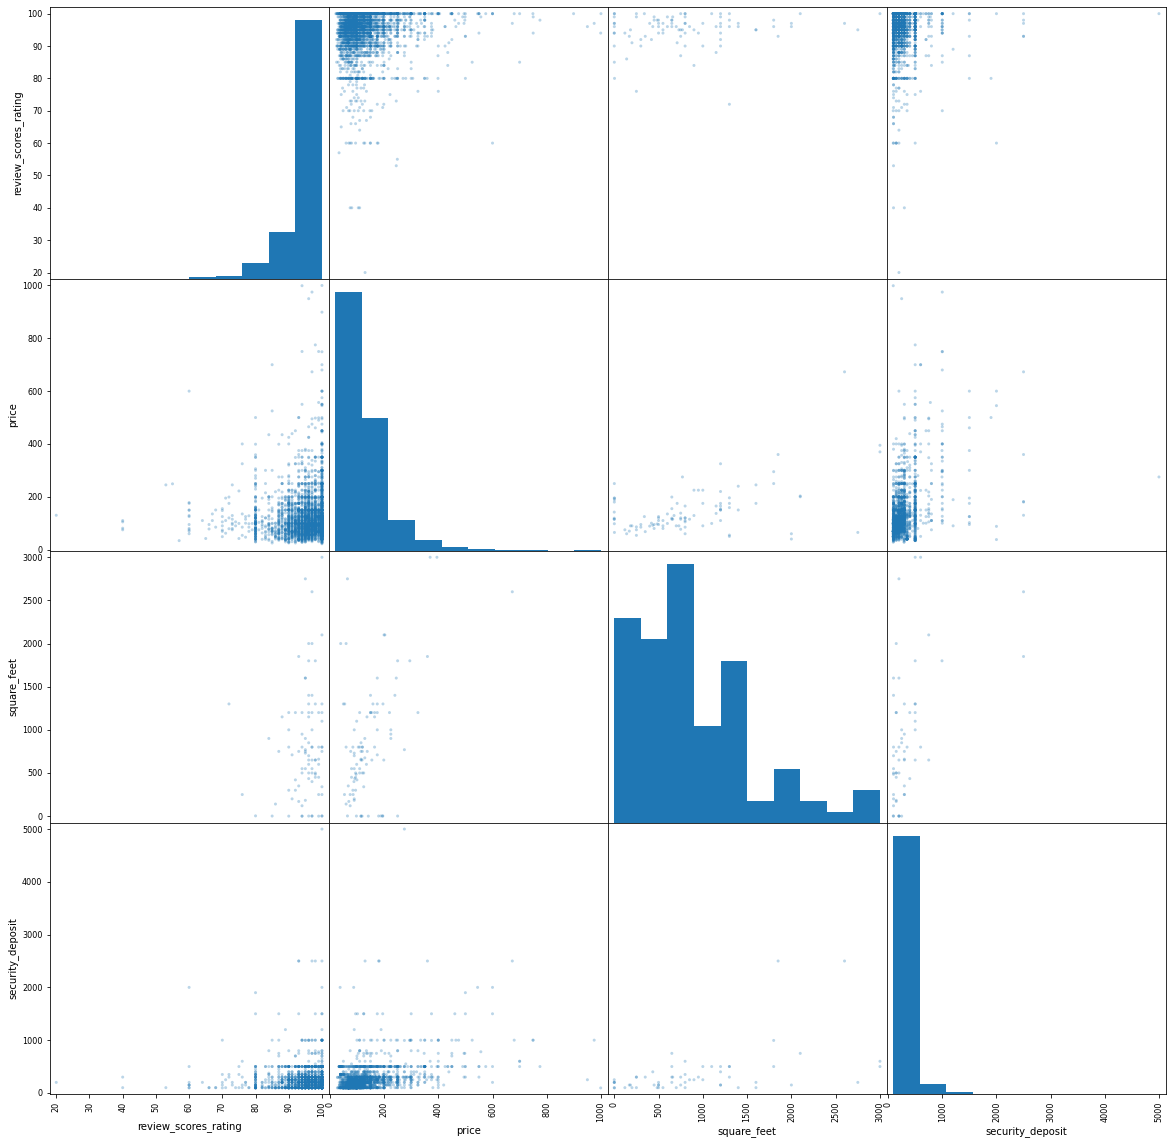

In [30]:
pd.plotting.scatter_matrix(\
    list_df[['review_scores_rating', 'price', 'square_feet', 'security_deposit']],\
    figsize=(20,20),\
    alpha=.3
);

There is a clear relation between price and square footage, but the same cannot be said for rating
Even though it is good for price, the percentage of missing values is too large
I think we are better off leaving this column out of the analysis

There may still be some relations with security_deposit and price/quality but the amount of missing values is also large. We will create a boolean "requires_security_deposit" from the security_deposit column and leave it as well

In [31]:
# dropping listings with missing quality ratings
list_df = list_df.dropna(subset=['review_scores_rating'])

# test no more missing values for ratings
assert list_df['review_scores_rating'].isna().any() == False

# droping monthly, weekly prices and square_feet columns
many_missing_val_columns = ['weekly_price', 'monthly_price', 'square_feet']
list_df = list_df.drop(columns=many_missing_val_columns)

# test columns have been removed
assert len(list(filter(lambda col_name: col_name in many_missing_val_columns, list_df.columns))) == 0

# create column "requires_security_deposit"
list_df['require_security_deposit'] = list_df['security_deposit'].notna()

# test column was created successfully
assert list_df['require_security_deposit'].dtype == bool
assert list_df['security_deposit'].notna().mean() == list_df['require_security_deposit'].mean()
list_df = list_df.drop(columns=['security_deposit'])

In [32]:
# impute mode for missing values
missing_values_df = list_df.select_dtypes(exclude=[object]).isna().mean().sort_values()
cols_with_missing_values = missing_values_df[missing_values_df != 0].index

list_df[cols_with_missing_values] = list_df[cols_with_missing_values].fillna(value=list_df[cols_with_missing_values].mode().iloc[0])

assert (list_df[cols_with_missing_values].isna().mean() == 0).all()

In [33]:
# lastly, lets create dummy variables for our categorical columns
cat_dummies_df = pd.get_dummies(list_df.select_dtypes(include='category'), prefix_sep='-')

# separating df to be used for ml from original one
list_df_for_ml = list_df.copy()\
    .merge(right=cat_dummies_df, right_index=True, left_index=True)\
    .drop(columns=list_df.select_dtypes(include=['category', 'object']).columns)

list_df_for_ml.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 0 to 3814
Data columns (total 117 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    id                                     int64  
 1    host_is_superhost                      bool   
 2    host_listings_count                    float64
 3    host_total_listings_count              float64
 4    host_has_profile_pic                   bool   
 5    host_identity_verified                 bool   
 6    latitude                               float64
 7    longitude                              float64
 8    is_location_exact                      bool   
 9    accommodates                           int64  
 10   bathrooms                              float64
 11   bedrooms                               float64
 12   beds                                   float64
 13   price                                  float64
 14   cleaning_fee                          

### Assessing reviews

In [34]:
print(rev_df.info())
rev_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB
None


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Business Understanding

Questions:

1. What makes a good quality Airbnb listing?
2. What should a listing have to get a good rate?
3. Does quality correlate with price? Can guests balance quality and price (at least in the Seattle area)?
4. Does quality relate to vacancy?

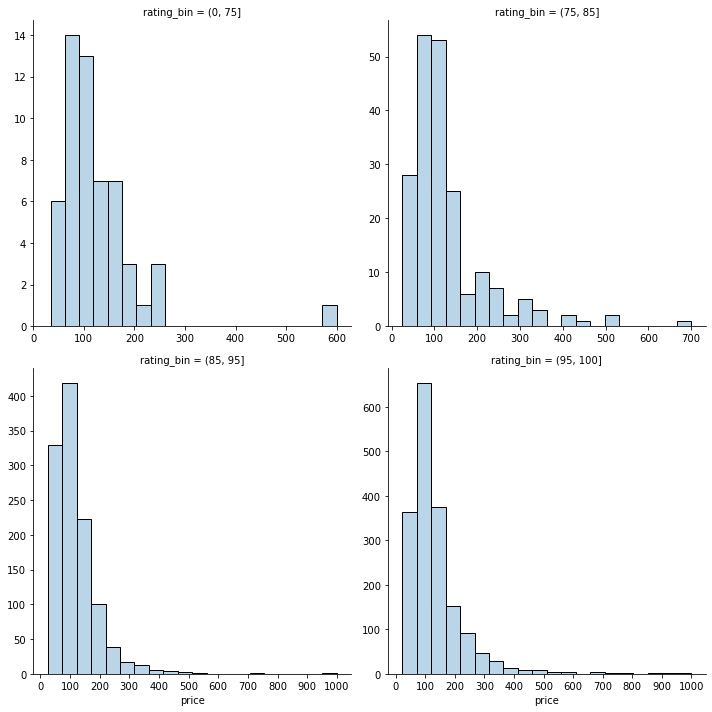

In [35]:
# answering question
# Does quality correlate with price? Can guests balance quality and price (at least in the Seattle area)?
list_df['rating_bin'] = pd.cut(x=list_df['review_scores_rating'], bins=[0,75, 85, 95, 100])

def plot_histogram(x, alpha, bins, color, *args):
    sns.histplot(x, alpha=alpha, bins=bins)
    xticks = np.arange(0, x.max()+50, 100)
    plt.xticks(xticks, [f'{int(number)}' for number in xticks])

fg = sns.FacetGrid(data=list_df, col='rating_bin', col_wrap=2, sharey=False, sharex=False, height=5, aspect=1)
# fg.map(sns.histplot, 'price', alpha=.3, bins=20);
fg.map(plot_histogram, 'price', alpha=.3, bins=20);

# number of observations increase with rating
# for all buckets of rating quality the price seems to peak at around 100 dollars per night
# The vast majority of listings on this dataset are of higher quality and pricier ones are mostly outliers

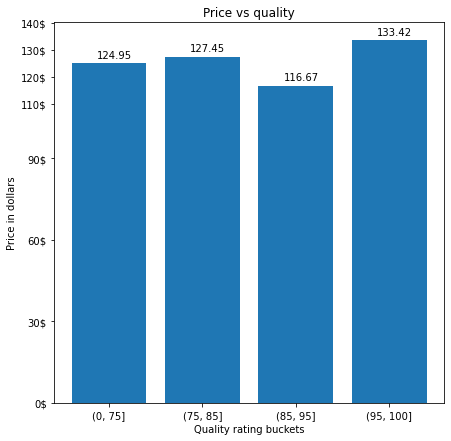

In [36]:
price_by_quality = list_df.groupby('rating_bin')['price'].mean()
fig = plt.figure(figsize=(7,7))
ax = plt.bar(x=price_by_quality.index.astype(str), height=price_by_quality.values)
yticks = [0, 30, 60, 90, 110, 120, 130, 140]
plt.yticks(ticks=yticks, labels=[f'{tick}$' for tick in yticks])
plt.title('Price vs quality')
plt.xlabel('Quality rating buckets')
plt.ylabel('Price in dollars')

for bar in ax:
    plt.annotate(bar.get_height().round(2), xy=(bar.get_xy()[0] + bar.get_width()/3, bar.get_height() + 2))

# Indeed, rating buckets of 0-75, 75-85 and 95-100 do seem to have a somewhat linear relation
# But that thesis is challenged by avg rating of 85-95 which deviates from this by a relative wide margin

# Regardless of relation, price average varies
# by an order of units of dollars instead of tens or even hundreds of dollars

# I have some degree of confidence that guests can balance price and quality in Seattle

plt.savefig(fname="avgprice_by_ratingbin.png", facecolor="white")

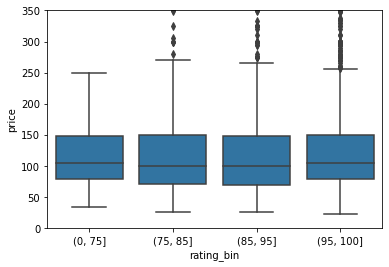

In [185]:
sns.boxplot(data=list_df, x='rating_bin', y='price', color=sns.color_palette()[0])
plt.ylim(0, 350);

In [37]:
# What makes a good quality Airbnb listing?

# We have too many features for a manual exploration
# inspired by the "Putting it all together" lesson, we will use be using ML to assess
# the features most important for predicting price

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = list_df_for_ml[list(filter(lambda col_name: col_name not in ['review_scores_rating', 'id'], list_df_for_ml.columns))]
y = list_df_for_ml['review_scores_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)
scaled_y_train = y_train
scaled_y_test = y_test
model = LinearRegression()

model.fit(scaled_x_train, scaled_y_train)
y_pred = model.predict(scaled_x_test)

print(r2_score(scaled_y_test, y_pred))
mean_squared_error(scaled_y_test, y_pred)

0.6208732180918677


18.423952856426613

In [38]:
def coef_weights(model, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = model.coef_
    coefs_df['abs_coefs'] = np.abs(model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

coef_weights(model, X_train).head(60)

# from the absolute value of the coeficients from out linear model, features that look related to quality the most
# are related to room, property and bed types as well as cancelation policies and host response time.
# surprisingly, host listings count also seem to have negative predictive power over quality ratings

,est_int,coefs,abs_coefs
1,host_listings_count,-3.583165e+11,3.583165e+11
2,host_total_listings_count,3.583165e+11,3.583165e+11
104,room_type-Entire home/apt,2.156184e+11,2.156184e+11
105,room_type-Private room,2.109618e+11,2.109618e+11
97,property_type-House,1.796653e+11,1.796653e+11
88,property_type-Apartment,1.790866e+11,1.790866e+11
114,cancellation_policy-strict,9.549236e+10,9.549236e+10
113,cancellation_policy-moderate,9.378459e+10,9.378459e+10
112,cancellation_policy-flexible,8.459560e+10,8.459560e+10
111,bed_type-Real Bed,8.076027e+10,8.076027e+10


In [39]:
# does quality influence vacancy?

# merge bookings with listings dataframe tossing listings not on list_df
list_availability_df = cal_df.merge(right=list_df, left_on='listing_id', right_on='id')

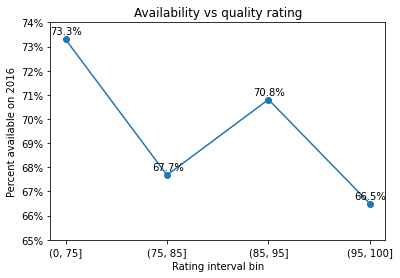

In [205]:
average_availability_by_ratingbin = list_availability_df.groupby('rating_bin')['available'].mean()

# make sure these are percentages for presentation
average_availability_by_ratingbin.loc[:] = average_availability_by_ratingbin.loc[:]*100
x = average_availability_by_ratingbin.index.astype(str)
y = average_availability_by_ratingbin.values

plt.plot(x, y)
plt.scatter(x, y)
plt.yticks(ticks=np.arange(65, 75, 1), labels=[f'{tick}%' for tick in np.arange(65, 75, 1)])
plt.title("Availability vs quality rating")
plt.ylabel("Percent available on 2016")
plt.xlabel("Rating interval bin");

for idx in range(4):
  plt.annotate(f'{round(y[idx], 1)}%', xy=(idx - 0.15,y[idx] + 0.2))

# Availability seems to trend downward as the quality rating increases
# peak quality listings and were on average 7% less vacant in relation to the worst rated listings in the year of 2016

plt.savefig(fname="vacancy_by_ratingbin.png", facecolor="white")

In [41]:
cal_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN


In [42]:
all_ids = pd.DataFrame([False for listing_id in list_df['id'].values], index=list_df['id'].values, columns=['is_in_cal_df'])
not_in_list_df = []
assert all_ids.shape == (list_df.shape[0], 1)

indexes_set = set(all_ids.index)

cal_df['in_list_df'] = cal_df['listing_id'].isin(list_df['id'].values)
cal_df['in_list_df'].all()

cal_df.query('in_list_df == False')['listing_id'].unique().shape[0]




647

In [43]:
review_by_quality = rev_df.dropna(subset=['comments']).merge(right=list_df, left_on='listing_id', right_on='id').groupby('rating_bin')

groups = [review_by_quality.get_group(group) for group in review_by_quality.groups]

texts_by_rating = { rating_bin: "\n".join(groups[idx]['comments'].values) for (idx, rating_bin) in enumerate(['(0, 75]', '(75, 85]', '(85, 95]', '(95, 100]']) }

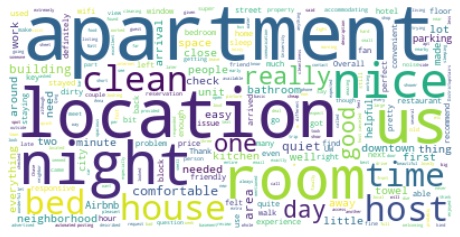

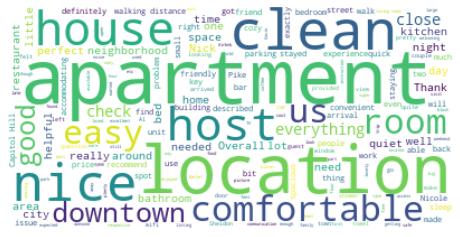

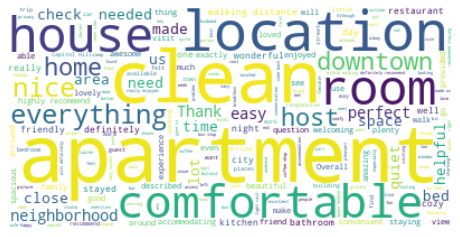

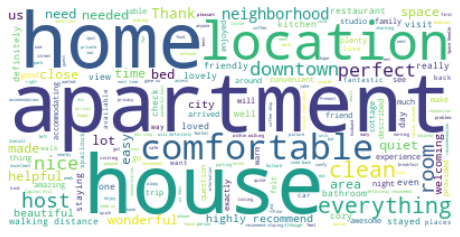

In [44]:
# Maybe review words can tell us about quality
# lets try looking at the most frequent non stop words by rating bin and look for divergences

# adapted from https://github.com/amueller/word_cloud/blob/master/examples/masked.py <- boilerplate

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

def make_wordcloud(text, custom_stop_words):

    stopwords = set(STOPWORDS)
    for word in custom_stop_words:
        stopwords.add(word)

    wc = WordCloud(background_color="white", max_words=2000,
                   stopwords=stopwords, contour_width=3, contour_color='steelblue')

    # generate word cloud
    wc.generate(text)

    # show
    plt.figure(figsize=(8,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
extra_stop_words = ['place', 'Melissa', 'great', 'u', 'Seattle', 'stay', ' ']
for text_blob in texts_by_rating.keys():
    make_wordcloud(texts_by_rating[text_blob], extra_stop_words)

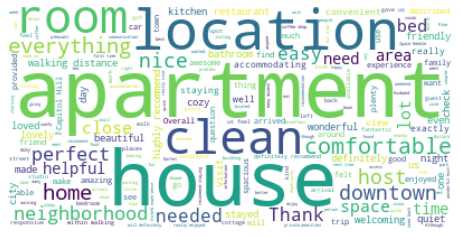

In [45]:
# benchmark binned word clouds with overall wordcloud
make_wordcloud(" \n ".join(rev_df.dropna(subset=['comments']).merge(right=list_df, left_on='listing_id', right_on='id')['comments'].values), extra_stop_words)

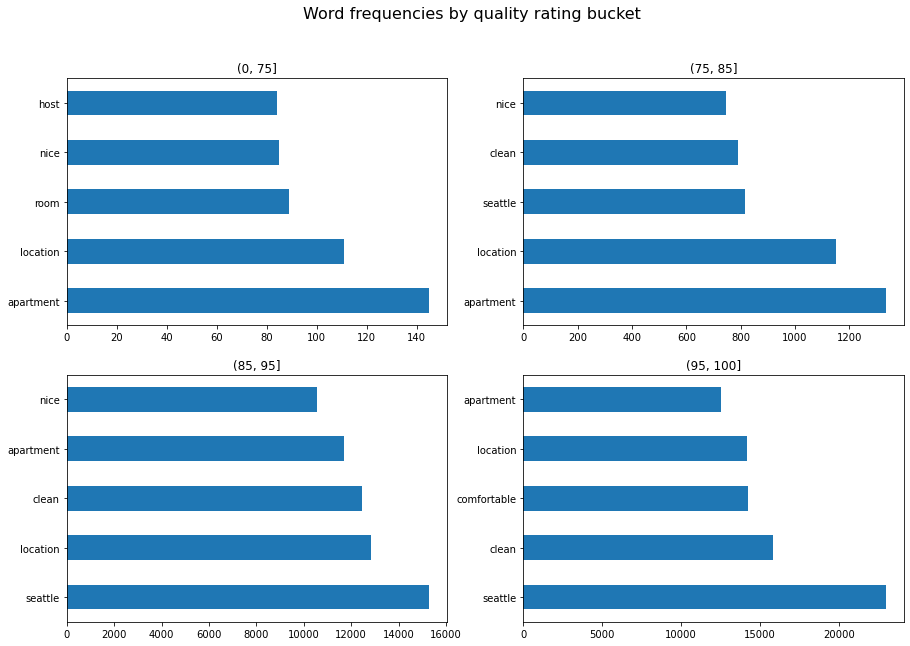

In [207]:
# turns out wordclouds may not be the best way to visualize differences in word usage
# because our word frequencies are a little too similar
# lets try and visualize this thsough word frequency bar charts

def generate_word_frequencies(text, stop_words):
    freqs = {}
    for word in text.split(" "):
        if (word in stop_words):
            continue
        count = freqs.get(word, 0)
        freqs[word] = count + 1
    return freqs

stop_words = set(STOPWORDS)
for extra_stop_word in extra_stop_words:
    stop_words.add(extra_stop_word)
stop_words.add('-')
stop_words.add('')
stop_words.add('us')
stop_words.add('melissa')

def strip_punctiation_and_specials(text):
    undesired = ['\n', '\t', '!', ',', '.', '\r']
    sanitized_text = str(text)
    for char in undesired:
        sanitized_text = sanitized_text.replace(char, " ")
    return sanitized_text

w_freqs = {}

for key in texts_by_rating.keys():
    w_freqs[key] = generate_word_frequencies(strip_punctiation_and_specials(texts_by_rating[key]).lower(), stop_words)

word_freqs_df = pd.DataFrame(w_freqs)

plt.figure(figsize=(15,10))
axes_index = 1
plt.gcf().suptitle('Word frequencies by quality rating bucket', fontsize=16)
for key in texts_by_rating.keys():
    plt.gcf().add_subplot(2,2,axes_index)
    axes_index += 1
    word_freqs_df[key].dropna().sort_values(ascending=False).iloc[:5].plot.barh(title=key)

# one interesting trend from the facetted charts
# is how qualities like "Seattle", "clean" and "confortable" rise in prominence as we progress from lower to upper rating bins
# surpassing location, which seems to be a key factor across all ratings
# maybe listings with higher ratings feel more livable (clean/confy) and more "Seattle-y" (enphasize the locality of where they stand)

# clean and comfortable would corroborate with the factors we found best predictors of a high rating (property, room, bed types and host responsiveness)
# I can use this visualization in the blog post
plt.savefig(fname="reviews_wordcount_by_ratingbin.png", facecolor="white")


(47.54007865786262, 47.70812154981534) (-122.41641792245368, -122.26704650749181)
(47.52109111658206, 47.73683203249221) (-122.42099323320802, -122.26454186525882)
(47.496043919833426, 47.74332730099372) (-122.4253703262119, -122.24603706318632)
(47.493674865446415, 47.74477138680855) (-122.42432576259137, -122.24912109476674)


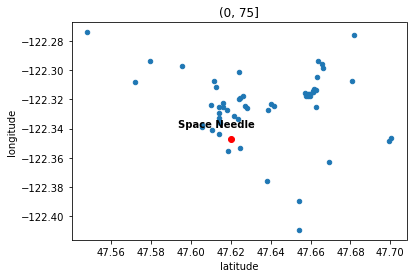

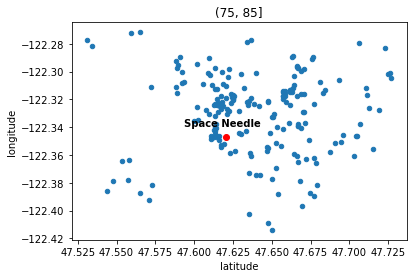

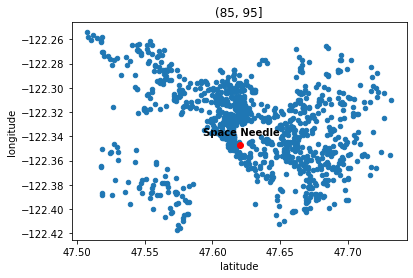

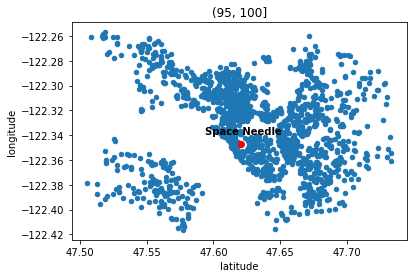

In [199]:
# bonus exploration just for fun!
# I was surprised how latitude and longitude were not great predictors at all! I had high hopes they would be
# I want to look at them myself to be absolutely sure no relation can be drawn
# I will even put in the space needle landmark in there for reference

for rating_bin in texts_by_rating.keys():
  list_df[list_df.rating_bin.astype(str) == rating_bin].loc[:,['latitude', 'longitude']].plot.scatter(x='latitude', y='longitude', title=rating_bin)
  print(plt.gca().get_xlim(), plt.gca().get_ylim())
  plt.gca().scatter(x=47.620278, y=-122.347222, color="red")
  plt.gca().annotate("Space Needle", [47.593278, -122.339222], color="black", weight="bold", fontsize=10)

# Indeed, I am unable to find any particular trends in the charts as we progress rating bin or the heatmaps
# unfortunate!

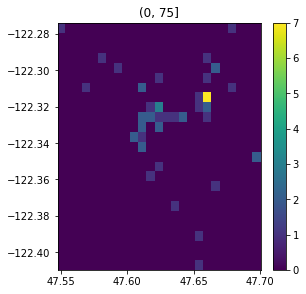

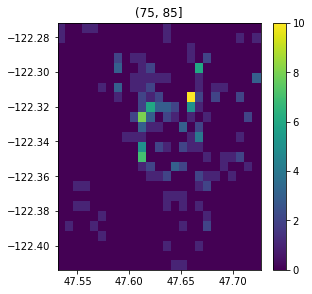

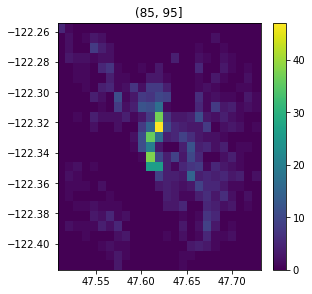

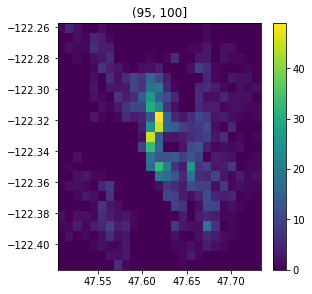

In [201]:

axes_index = 1
for rating_bin in texts_by_rating.keys():
  fig = plt.figure(figsize=(10,10))
  fig.add_subplot(2,2,axes_index)
  axes_index += 1
  plt.gca().hist2d(x=list_df[list_df.rating_bin.astype(str) == rating_bin].loc[:,'latitude'], y=list_df[list_df.rating_bin.astype(str) == rating_bin].loc[:,'longitude'], bins=(25,25));
  plt.colorbar(plt.gca().get_children()[0], ax=fig.gca())
  plt.title(rating_bin)


- https://stackoverflow.com/questions/61960929/extract-only-columns-that-contains-true-value-from-a-dataframe-in-pandas
- https://stackoverflow.com/questions/25351968/how-can-i-display-full-non-truncated-dataframe-information-in-html-when-conver
- https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/
- https://towardsdatascience.com/cleaning-and-extracting-json-from-pandas-dataframes-f0c15f93cb38
- https://intellipaat.com/community/20261/element-wise-logical-or-in-pandas
- https://www.datacamp.com/community/tutorials/wordcloud-python
- Udacity Data Scientist Nanodegree - Course materials
- https://www.fcc.gov/media/radio/dms-decimal
- pandas, matplotlib and python docs